📊 Airbnb NYC Data Cleaning Notebook
Author: Rahul Srinivasan
Objective: Clean and preprocess the raw dataset for analysis and visualization

In [22]:
import pandas as pd
import numpy as np

df = pd.read_csv("../data/raw/Airbnb_Open_Data.csv")

df.head(2)

C:\Users\USER\AppData\Local\Temp\ipykernel_13984\816577424.py:4: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/raw/Airbnb_Open_Data.csv")


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN


**finding the total conut of null values based on each columns**

In [23]:
df.isnull().sum().sort_values(ascending=False)

license                           102597
house_rules                        52131
last review                        15893
reviews per month                  15879
country                              532
availability 365                     448
minimum nights                       409
host name                            406
review rate number                   326
calculated host listings count       319
host_identity_verified               289
service fee                          273
NAME                                 250
price                                247
Construction year                    214
number of reviews                    183
country code                         131
instant_bookable                     105
cancellation_policy                   76
neighbourhood group                   29
neighbourhood                         16
long                                   8
lat                                    8
id                                     0
host id         

Creating a copy of data frame

In [24]:
df_cleaned = df.copy()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

converting last review into datetime data type

In [25]:
df_cleaned['last review'] = pd.to_datetime(df_cleaned['last review'], errors = 'coerce')

df_cleaned['price'] = df_cleaned['price'].replace(r'[\$,]', '', regex=True)

df_cleaned['price'] = pd.to_numeric(df_cleaned['price'], errors='coerce')
# df_cleaned.info()

df_cleaned['price'].head(2)

0    966.0
1    142.0
Name: price, dtype: float64

A binary feature had_review was engineered to flag listings with missing or present last_review values, enhancing our ability to analyze and segment data without loss of row-level detail

In [26]:
df_cleaned['had_review'] = df_cleaned['last review'].notnull().astype(int)

creating a function to get the required deatils of columns

In [27]:
def column_summary(df):
    return pd.DataFrame({
        'Data Type': df.dtypes,
        'Missing Count': df.isnull().sum(),
        'Missing %': (df.isnull().sum() / len(df)) * 100,
        'Unique Values': df.nunique()
    }).sort_values(by='Missing %', ascending=False)


column_summary(df_cleaned)

,Data Type,Missing Count,Missing %,Unique Values
license,object,102597,99.998051,1
house_rules,object,52131,50.810437,1976
last review,datetime64[ns],15893,15.490404,2477
reviews per month,float64,15879,15.476759,1016
country,object,532,0.518524,1
availability 365,float64,448,0.436651,438
minimum nights,float64,409,0.398639,153
host name,object,406,0.395715,13190
review rate number,float64,326,0.317742,5
calculated host listings count,float64,319,0.310919,78


filling the NA with predefined values

In [28]:
df_cleaned['NAME'] = df_cleaned['NAME'].fillna('Unknown')


df_cleaned['host name'] = df_cleaned['host name'].fillna('Unknown')

df_cleaned['neighbourhood group'] = df_cleaned['neighbourhood group'].fillna(df_cleaned['neighbourhood group'].mode()[0])

df_cleaned['neighbourhood'] = df_cleaned['neighbourhood'].fillna(df_cleaned['neighbourhood'].mode()[0])

df_cleaned['reviews per month'] = df_cleaned['reviews per month'].fillna(df_cleaned['reviews per month'].median())


df_cleaned.head(2)


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license,had_review
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN,1
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN,1


To perform a visual assessment of the distribution and potential outliers in the price column of the Airbnb NYC dataset.

In [29]:
df_cleaned['price'].describe()

count    102352.000000
mean        625.293536
std         331.671614
min          50.000000
25%         340.000000
50%         624.000000
75%         913.000000
max        1200.000000
Name: price, dtype: float64

Histograms show the frequency of different price ranges, which helps in detecting skewness or common pricing tiers.

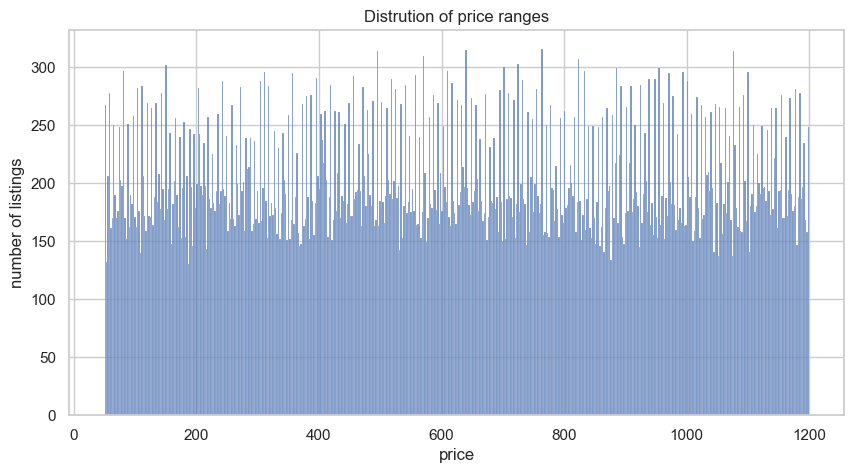

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

plt.figure(figsize=(10,5))
sns.histplot(df_cleaned['price'],bins=500,kde=False)
plt.title('Distrution of price ranges')
plt.xlabel('price')
plt.ylabel('number of listings')
plt.show()

box plot for outliers detection


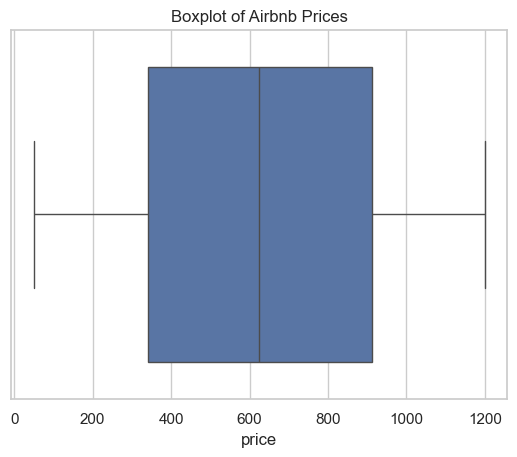

In [31]:
plt.Figure(figsize=(10,5))

sns.boxplot(x=df_cleaned['price'])
plt.title('Boxplot of Airbnb Prices')
plt.xlabel('price')
plt.show()

calculate IQR and percentiles

Low IQR (like Dataset A)	Most listings follow a common pricing strategy. You can forecast pricing or demand more reliably.

High IQR (like Dataset B)	There's greater pricing diversity — may indicate multiple market segments (budget vs premium).

In [32]:
q1 = df_cleaned['price'].quantile(0.25)
q2 = df_cleaned['price'].quantile(0.50)
q3 = df_cleaned['price'].quantile(0.75)

IQR = q3-q1

print(f"q1 = {q1}, q2 = {q2}, q3 = {q3}, IQR = {IQR}")

q1 = 340.0, q2 = 624.0, q3 = 913.0, IQR = 573.0


lower bound and upper bound

In [33]:
lower_bound = q1 - 1.5 * IQR

upper_bound = q3 + 1.5 * IQR

print(f"lower_bound : {lower_bound} \n upper_bound : {upper_bound}")

lower_bound : -519.5 
 upper_bound : 1772.5


find the low and high outliers

In [34]:
outlier_low = df_cleaned['price']<lower_bound

outlier_high = df_cleaned['price']>upper_bound

print(outlier_high.value_counts(),outlier_low.value_counts())

# df_outliers_filtered = df_cleaned[(df_cleaned['price']<= lower_bound) & (df_cleaned['price']>= upper_bound)].copy()

price
False    102599
Name: count, dtype: int64 price
False    102599
Name: count, dtype: int64


In [35]:
df_cleaned.describe()['price']

count    102352.000000
mean        625.293536
min          50.000000
25%         340.000000
50%         624.000000
75%         913.000000
max        1200.000000
std         331.671614
Name: price, dtype: float64

In [36]:
pd.DataFrame(df_cleaned['neighbourhood group'].value_counts())

df_cleaned['neighbourhood group'].unique()

df_cleaned['neighbourhood group'].value_counts()

neighbourhood group
Manhattan        43821
Brooklyn         41842
Queens           13267
Bronx             2712
Staten Island      955
brookln              1
manhatan             1
Name: count, dtype: int64

Assess Uniqueness & Cardinality

Check how many distinct values exist (nunique)

Spot unexpected or inconsistent entries (e.g., misspellings, case issues)



In [37]:
df_cleaned['neighbourhood group'].replace({'brookln' : 'Brooklyn',
                                          'manhatan':'Manhattan'}, inplace=True)

df_cleaned['neighbourhood group'] = df_cleaned['neighbourhood group'].str.title()

max_state_name = df_cleaned['neighbourhood group'].value_counts().idxmax()
max_state_count = df_cleaned['neighbourhood group'].value_counts().max()

min_state_name = df_cleaned['neighbourhood group'].value_counts().idxmin()
min_state_count = df_cleaned['neighbourhood group'].value_counts().min()



print(f"max state is {max_state_name} with count of {max_state_count} and min state is {min_state_name} with count of {min_state_count}")

print(df_cleaned['neighbourhood group'].unique())

df_cleaned['neighbourhood group'].value_counts()



max state is Manhattan with count of 43822 and min state is Staten Island with count of 955
['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


C:\Users\USER\AppData\Local\Temp\ipykernel_13984\1246781179.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['neighbourhood group'].replace({'brookln' : 'Brooklyn',


neighbourhood group
Manhattan        43822
Brooklyn         41843
Queens           13267
Bronx             2712
Staten Island      955
Name: count, dtype: int64

validdating room types

In [38]:
df_cleaned['room type'].unique()

df_cleaned['room type'].isnull().sum()

np.int64(0)

Import this as a CSV file

In [39]:
# Adjust the path to go up one directory and then to 'data/cleaned'
df_cleaned.to_csv('../data/cleaned/cleaned_airbnb_nyc_data.csv', index=False)
